<a href="https://www.kaggle.com/code/cozyhn/s3e18-0-63184-autogluon-baseline-code-and-eda?scriptVersionId=134994687" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Baseline model use autogluon

## **With EDA pandas_profiling,heatmap, some_img**

### Load libarays

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
print("done")

done


In [2]:
!cp -r /kaggle/input/autogluon-package/* ./
print("done")

done


In [3]:
!pip install -q --no-index --find-links='/kaggle/input/autogluon-package/' 'autogluon.tabular-0.7.0-py3-none-any.whl'
print("done")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.29.133 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
done


In [4]:
!pip install -q ray==2.2.0
print("done")

done


In [5]:
!pip install -q pandas_profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.


In [6]:
from pandas_profiling import ProfileReport

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

In [7]:
from autogluon.tabular import TabularPredictor, TabularDataset

In [8]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [9]:
path='../input/playground-series-s3e18/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
origin = pd.read_csv('/kaggle/input/ec-mixed-class/mixed_desc.csv')
submission = pd.read_csv(path+'sample_submission.csv')

In [10]:
train=train.drop("id",axis=1)
test=test.drop("id",axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

### Slicing origin col

In [12]:
origin

CIDs  MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
0     C00009        8.881944       -4.638889           8.881944   
1     C00013        9.626875       -5.050347           9.626875   
2     C00014        0.000000        0.000000           0.000000   
3     C00017       10.860741       -0.931481          10.860741   
4     C00022        9.543981       -1.379630           9.543981   
...      ...             ...             ...                ...   
1034  C22158        4.750000        0.250000           4.750000   
1035  C22169       13.516859       -0.727746          13.516859   
1036  C22180       13.606147       -2.044178          13.606147   
1037  C22181       13.774221       -2.149645          13.774221   
1038  C22220       10.465417       -2.866319          10.465417   

      MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  \
0              4.638889  0.341891   97.994          94.970   97.976895   
1              2.958333  0.407078  177.973         173.941  177.943226   
2              0.000000  0.397555   17.031          14.007   17.026549   
3              0.215832  0.407584  130.103         124.055  130.037842   
4              0.824074  0.445928   88.062          84.030   88.016044   
...                 ...       ...      ...             ...         ...   
1034           0.250000  0.371490   16.023          14.007   16.018724   
1035           0.138810  0.536654  405.458         382.274  405.180090   
1036           0.276604  0.060282  831.693         794.397  831.197041   
1037           0.322613  0.051119  993.834         946.458  993.249864   
1038           1.121667  0.337361  164.113         156.049  164.032088   

      NumValenceElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                      32  ...             0           0                  0   
1                      56  ...             0           0                  0   
2                       8  ...             0           0                  0   
3                      50  ...             0           0                  0   
4                      34  ...             0           0                  0   
...                   ...  ...           ...         ...                ...   
1034                    7  ...             0           0                  0   
1035                  154  ...             0           0                  0   
1036                  316  ...             0           0                  0   
1037                  380  ...             0           0                  0   
1038                   64  ...             0           0                  0   

      fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0                0            0            0             0                 0   
1                0            0            0             0                 0   
2                0            0            0             0                 0   
3                0            0            0             0                 0   
4                0            0            0             0                 0   
...            ...          ...          ...           ...               ...   
1034             0            0            0             0                 0   
1035             0            0            0             0                 0   
1036             0            0            0             0                 0   
1037             0            0            0             0                 0   
1038             0            0            0             0                 0   

      fr_urea  EC1_EC2_EC3_EC4_EC5_EC6  
0           0              1_1_1_1_0_1  
1           0              1_1_1_1_0_1  
2           0              1_1_1_1_0_1  
3           0              0_1_1_0_0_0  
4           0              1_1_1_1_0_1  
...       ...                      ...  
1034        0              0_1_0_0_0_1  
1035        0              1_1_0_0_0_0  
1036        0              0_1_1_0_

In [13]:
columns_to_keep = [
    "BertzCT", "Chi1", "Chi1n", "Chi1v", "Chi2n", "Chi2v", "Chi3v", "Chi4n", 
    "EState_VSA1", "EState_VSA2", "ExactMolWt", "FpDensityMorgan1", "FpDensityMorgan2",
    "FpDensityMorgan3", "HallKierAlpha", "HeavyAtomMolWt", "Kappa3", "MaxAbsEStateIndex", 
    "MinEStateIndex", "NumHeteroatoms", "PEOE_VSA10", "PEOE_VSA14", "PEOE_VSA6", 
    "PEOE_VSA7", "PEOE_VSA8", "SMR_VSA10", "SMR_VSA5", "SlogP_VSA3", "VSA_EState9", 
    "fr_COO", "fr_COO2", "EC1_EC2_EC3_EC4_EC5_EC6"
]
origin = origin[columns_to_keep]

In [14]:
origin = origin.copy()
origin["EC1"] = origin["EC1_EC2_EC3_EC4_EC5_EC6"].str[0].astype('uint8')
origin["EC2"] = origin["EC1_EC2_EC3_EC4_EC5_EC6"].str[2].astype('uint8')
origin["EC3"] = origin["EC1_EC2_EC3_EC4_EC5_EC6"].str[4].astype('uint8')
origin["EC4"] = origin["EC1_EC2_EC3_EC4_EC5_EC6"].str[6].astype('uint8')
origin["EC5"] = origin["EC1_EC2_EC3_EC4_EC5_EC6"].str[8].astype('uint8')
origin["EC6"] = origin["EC1_EC2_EC3_EC4_EC5_EC6"].str[10].astype('uint8')
origin = origin.drop(columns=['EC1_EC2_EC3_EC4_EC5_EC6'])

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

In [16]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            1039 non-null   float64
 1   Chi1               1039 non-null   float64
 2   Chi1n              1039 non-null   float64
 3   Chi1v              1039 non-null   float64
 4   Chi2n              1039 non-null   float64
 5   Chi2v              1039 non-null   float64
 6   Chi3v              1039 non-null   float64
 7   Chi4n              1039 non-null   float64
 8   EState_VSA1        1039 non-null   float64
 9   EState_VSA2        1039 non-null   float64
 10  ExactMolWt         1039 non-null   float64
 11  FpDensityMorgan1   1039 non-null   float64
 12  FpDensityMorgan2   1039 non-null   float64
 13  FpDensityMorgan3   1039 non-null   float64
 14  HallKierAlpha      1039 non-null   float64
 15  HeavyAtomMolWt     1039 non-null   float64
 16  Kappa3             1039 

In [17]:
cols = ['FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3']

for df_name, df in zip(["train", "origin"], [train, origin]):
    print(f"In {df_name}:")
    for col in cols:
        count = (df[col] == -666).sum()
        print(f"Number of -666 in {col}: {count}")

In train:
Number of -666 in FpDensityMorgan1: 1
Number of -666 in FpDensityMorgan2: 1
Number of -666 in FpDensityMorgan3: 1
In origin:
Number of -666 in FpDensityMorgan1: 1
Number of -666 in FpDensityMorgan2: 1
Number of -666 in FpDensityMorgan3: 1


In [18]:
#del outlier -666
cols = ['FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3']

for df_name in ["train", "origin"]:
    exec(f'{df_name} = {df_name}[~{df_name}[cols].isin([-666]).any(axis=1)].reset_index(drop=True)')
    exec(f'{df_name} = {df_name}[~{df_name}[cols].isin([-14.4584615]).any(axis=1)].reset_index(drop=True)')

In [19]:
path='/kaggle/working/'
profile = ProfileReport(train, title='Pandas Profiling Report', minimal=True)
profile.to_file(output_file=path+"output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
profile = ProfileReport(test, title='Pandas Profiling Report', minimal=True)
profile.to_file(output_file=path+"output2.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile = ProfileReport(origin, title='Pandas Profiling Report', minimal=True)
profile.to_file(output_file=path+"output3.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
columns_to_convert_uint8 = ['NumHeteroatoms', 'fr_COO', 'fr_COO2']
columns_to_convert_bool = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
for column in columns_to_convert_uint8:
    train[column] = train[column].astype('uint8')
    test[column] = test[column].astype('uint8')
    origin[column]= origin[column].astype('uint8')
for column in columns_to_convert_bool:
    train[column] = train[column].astype('uint8')
    origin[column]= origin[column].astype('uint8')

In [23]:
train = pd.concat([train, origin])
len_before = len(train)


train = train.drop_duplicates().reset_index(drop=True)
len_after = len(train)

print("Number of duplicate rows removed:", len_before - len_after)

Number of duplicate rows removed: 36


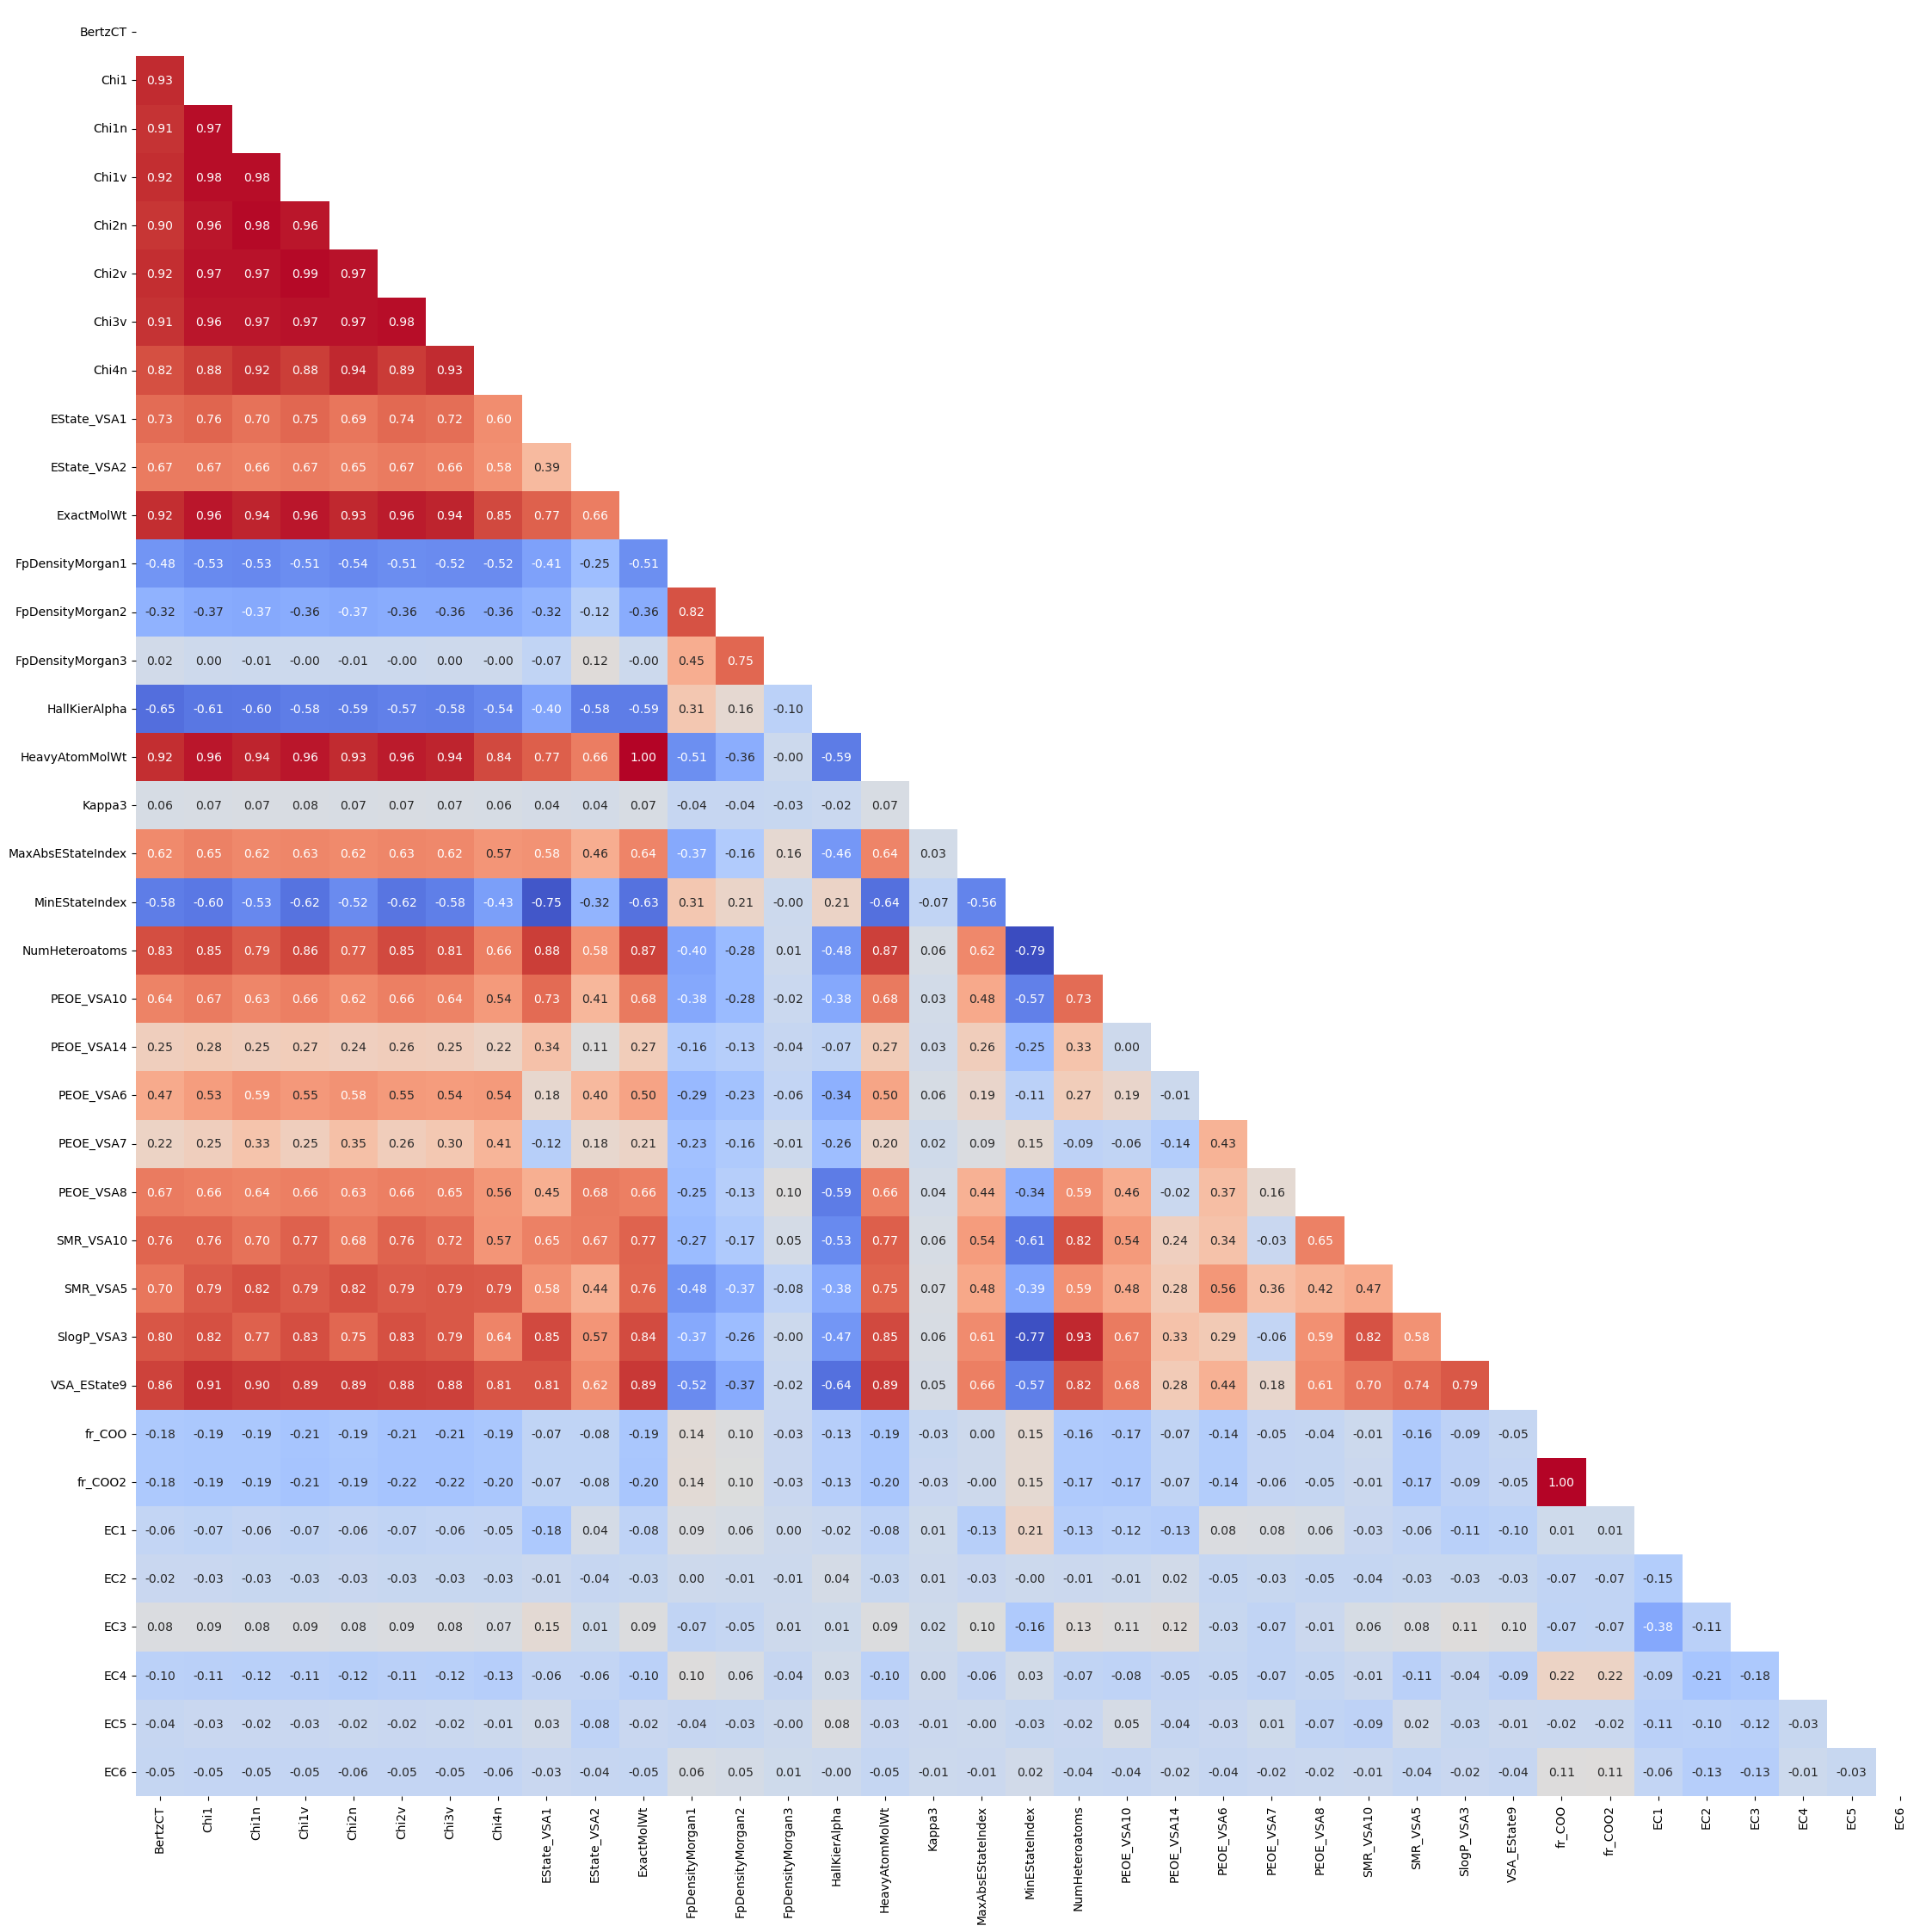

In [24]:
df_corr=train
corr = df_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(27, 27))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cmap='coolwarm',cbar=False)
plt.show()

In [25]:
train = TabularDataset(train)
test = TabularDataset(test)

In [26]:
trainEC1 = train.drop(columns=['EC6', 'EC2', 'EC3', 'EC4', 'EC5'])

In [27]:
excluded_model_types = ['KNN', 'NN_TORCH']
predictor1 = TabularPredictor(label='EC1', problem_type='binary',
                             eval_metric='roc_auc',sample_weight='balance_weight').fit(trainEC1,presets="best_quality",
                             auto_stack=True,fit_weighted_ensemble = True, save_space=True,excluded_model_types=excluded_model_types,
                             num_stack_levels=2, num_bag_folds=3,num_bag_sets=6, num_gpus = 0, num_cpus = 4,time_limit=1800)

# predictor1 = TabularPredictor(label='EC1', problem_type='binary',
#                               eval_metric='roc_auc',sample_weight='balance_weight').fit(trainEC1,fit_weighted_ensemble = True,
#                                                                                         save_space=True,excluded_model_types=excluded_model_types, num_cpus = 4,time_limit=500)

No path specified. Models will be saved in: "AutogluonModels/ag-20230627_065508/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=3, num_bag_sets=6
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "AutogluonModels/ag-20230627_065508/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Jun 24 10:55:41 UTC 2023
Train Data Rows:    15838
Train Data Columns: 31
Label Column: EC1
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Assigning sample weights to balance differences in frequency of classes.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memor

In [28]:
feature_importance = predictor1.feature_importance(trainEC1)
feature_importance

Computing feature importance via permutation shuffling for 31 features using 5000 rows with 5 shuffle sets...
	1738.26s	= Expected runtime (347.65s per shuffle set)
	977.02s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev       p_value  n  p99_high   p99_low
NumHeteroatoms       0.046031  0.001633  1.898073e-07  5  0.049394  0.042668
MinEStateIndex       0.035245  0.001621  5.355390e-07  5  0.038582  0.031907
EState_VSA1          0.027882  0.001022  2.158177e-07  5  0.029985  0.025779
MaxAbsEStateIndex    0.026906  0.000222  5.533233e-10  5  0.027363  0.026450
SlogP_VSA3           0.025476  0.000562  2.835899e-08  5  0.026632  0.024319
SMR_VSA10            0.025013  0.001014  3.230556e-07  5  0.027100  0.022926
PEOE_VSA10           0.024065  0.001037  4.120795e-07  5  0.026200  0.021931
PEOE_VSA8            0.023711  0.000718  1.006970e-07  5  0.025189  0.022233
Chi2v                0.023690  0.000529  2.978712e-08  5  0.024779  0.022601
VSA_EState9          0.022468  0.000745  1.445600e-07  5  0.024002  0.020935
EState_VSA2          0.021416  0.000497  3.485133e-08  5  0.022440  0.020393
Chi3v                0.020777  0.000478  3.368852e-08  5  0.021762  0.019792
BertzCT              0.020530  0.000831  3.214730e-07  5  0.022241  0.018819
HeavyAtomMolWt       0.020415  0.000612  9.694832e-08  5  0.021675  0.019154
Chi4n                0.020058  0.000331  8.939644e-09  5  0.020741  0.019376
Chi2n                0.019740  0.000425  2.587047e-08  5  0.020616  0.018864
Chi1v                0.019628  0.000351  1.219857e-08  5  0.020349  0.018906
Chi1                 0.019546  0.000757  2.701378e-07  5  0.021106  0.017986
ExactMolWt           0.019383  0.000544  7.443179e-08  5  0.020503  0.018262
Chi1n                0.019290  0.000421  2.711608e-08  5  0.020156  0.018424
PEOE_VSA7            0.018779  0.000518  6.939157e-08  5  0.019846  0.017713
SMR_VSA5             0.018653  0.000445  3.889279e-08  5  0.019570  0.017737
Kappa3               0.018192  0.000852  5.761689e-07  5  0.019946  0.016437
PEOE_VSA14           0.018118  0.000662  2.132967e-07  5  0.019481  0.016756
HallKierAlpha        0.017198  0.000855  7.321717e-07  5  0.018960  0.015437
FpDensityMorgan1     0.017009  0.000278  8.558154e-09  5  0.017582  0.016437
FpDensityMorgan2     0.016592  0.000589  1.907715e-07  5  0.017805  0.015378
FpDensityMorgan3     0.016422  0.000667  3.264151e-07  5  0.017796  0.015048
PEOE_VSA6            0.012194  0.000407  1.485502e-07  5  0.013031  0.011356
fr_COO2              0.006755  0.000337  7.452307e-07  5  0.007450  0.006060
fr_COO               0.006195  0.000358  1.332568e-06  5  0.006932  0.005458

In [29]:
# !pip install -q pygraphviz

In [30]:
# predictor1.plot_ensemble_model()

In [31]:
# img = mpimg.imread('AutogluonModels/ag-20230627_035721/ensemble_model.png')
# plt.figure(figsize=(10, 10))
# imgplot = plt.imshow(img)
# plt.show()

In [32]:
preds_EC1 = predictor1.predict_proba(test)

In [33]:
preds_EC1=preds_EC1.iloc[: , 1]

In [34]:
trainEC2 = train.drop(columns=['EC1', 'EC6', 'EC3', 'EC4', 'EC5'])

In [35]:
predictor2 = TabularPredictor(label='EC2', problem_type='binary',
                             eval_metric='roc_auc',sample_weight='balance_weight').fit(trainEC2,presets="best_quality",
                             auto_stack=True,fit_weighted_ensemble = True, save_space=True,excluded_model_types=excluded_model_types,
                             num_stack_levels=2, num_bag_folds=3,num_bag_sets=6, num_gpus = 0, num_cpus = 4,time_limit=1800)
# predictor2 = TabularPredictor(label='EC2', problem_type='binary',
#                              eval_metric='roc_auc',sample_weight='balance_weight').fit(trainEC2,fit_weighted_ensemble = True,
#                                                                                         save_space=True,excluded_model_types=excluded_model_types, num_cpus = 4,time_limit=500)

No path specified. Models will be saved in: "AutogluonModels/ag-20230627_073858/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=3, num_bag_sets=6
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "AutogluonModels/ag-20230627_073858/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Jun 24 10:55:41 UTC 2023
Train Data Rows:    15838
Train Data Columns: 31
Label Column: EC2
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Assigning sample weights to balance differences in frequency of classes.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memor

In [36]:
feature_importance = predictor2.feature_importance(trainEC2)
feature_importance

Computing feature importance via permutation shuffling for 31 features using 5000 rows with 5 shuffle sets...
	2216.89s	= Expected runtime (443.38s per shuffle set)
	1538.87s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev   p_value  n  p99_high   p99_low
fr_COO               0.036452  0.003146  0.000007  5  0.042929  0.029974
EState_VSA2          0.032317  0.005622  0.000106  5  0.043894  0.020741
PEOE_VSA7            0.029066  0.005056  0.000106  5  0.039475  0.018656
Chi4n                0.029001  0.001958  0.000002  5  0.033033  0.024970
FpDensityMorgan1     0.027667  0.001576  0.000001  5  0.030912  0.024423
Chi3v                0.024262  0.003079  0.000030  5  0.030602  0.017922
PEOE_VSA10           0.022786  0.003438  0.000060  5  0.029865  0.015707
SMR_VSA10            0.022484  0.004670  0.000211  5  0.032099  0.012869
HallKierAlpha        0.021676  0.005001  0.000317  5  0.031972  0.011379
VSA_EState9          0.020582  0.003048  0.000056  5  0.026858  0.014305
SMR_VSA5             0.020155  0.003001  0.000057  5  0.026335  0.013975
FpDensityMorgan3     0.019442  0.002270  0.000022  5  0.024116  0.014767
FpDensityMorgan2     0.018880  0.003846  0.000196  5  0.026800  0.010961
Chi1                 0.018831  0.003011  0.000076  5  0.025031  0.012630
fr_COO2              0.018191  0.001972  0.000016  5  0.022251  0.014130
BertzCT              0.017977  0.003414  0.000149  5  0.025006  0.010948
PEOE_VSA6            0.015536  0.001617  0.000014  5  0.018866  0.012206
SlogP_VSA3           0.015326  0.002127  0.000043  5  0.019707  0.010946
Chi1n                0.014887  0.002025  0.000040  5  0.019056  0.010717
Chi1v                0.014683  0.003418  0.000328  5  0.021721  0.007645
HeavyAtomMolWt       0.012589  0.002523  0.000184  5  0.017783  0.007395
Chi2n                0.012255  0.003534  0.000745  5  0.019531  0.004979
PEOE_VSA8            0.012179  0.002180  0.000118  5  0.016667  0.007690
Chi2v                0.011812  0.003427  0.000762  5  0.018868  0.004757
ExactMolWt           0.011608  0.002222  0.000154  5  0.016183  0.007033
MaxAbsEStateIndex    0.011359  0.003657  0.001129  5  0.018889  0.003829
EState_VSA1          0.010715  0.003776  0.001580  5  0.018491  0.002940
MinEStateIndex       0.009551  0.003199  0.001307  5  0.016137  0.002966
Kappa3               0.009286  0.004356  0.004429  5  0.018255  0.000318
PEOE_VSA14           0.004512  0.000936  0.000210  5  0.006438  0.002585
NumHeteroatoms      -0.000372  0.001230  0.732160  5  0.002160 -0.002905

In [37]:
preds_EC2 = predictor2.predict_proba(test)

In [38]:
preds_EC2=preds_EC2.iloc[: , 1]

In [39]:
!rm -rf /kaggle/working/*

In [40]:
submission['EC1'] = preds_EC1
submission['EC2'] = preds_EC2
submission

id       EC1       EC2
0     14838  0.360994  0.738927
1     14839  0.827741  0.781535
2     14840  0.721396  0.621941
3     14841  0.724122  0.792532
4     14842  0.773156  0.710463
...     ...       ...       ...
9888  24726  0.560188  0.727352
9889  24727  0.762875  0.851608
9890  24728  0.324576  0.698365
9891  24729  0.333979  0.827806
9892  24730  0.302422  0.815520

[9893 rows x 3 columns]

In [41]:
submission.to_csv('/kaggle/working/submission.csv', index=False)